In [3]:
import pandas as pd

credit_df = pd.read_excel('./datasets/default_of_credit_card_clients.xls', index_col = 0  )

In [10]:
credit_df = credit_df.drop('ID')

In [18]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      30000 non-null  float32
 1   X2      30000 non-null  float32
 2   X3      30000 non-null  float32
 3   X4      30000 non-null  float32
 4   X5      30000 non-null  float32
 5   X6      30000 non-null  float32
 6   X7      30000 non-null  float32
 7   X8      30000 non-null  float32
 8   X9      30000 non-null  float32
 9   X10     30000 non-null  float32
 10  X11     30000 non-null  float32
 11  X12     30000 non-null  float32
 12  X13     30000 non-null  float32
 13  X14     30000 non-null  float32
 14  X15     30000 non-null  float32
 15  X16     30000 non-null  float32
 16  X17     30000 non-null  float32
 17  X18     30000 non-null  float32
 18  X19     30000 non-null  float32
 19  X20     30000 non-null  float32
 20  X21     30000 non-null  float32
 21  X22     30000 non-null  float32
 22  X23

In [11]:
credit_df = credit_df.astype('float32')

In [12]:
credit_df['Y']

1        1.0
2        1.0
3        0.0
4        0.0
5        0.0
        ... 
29996    0.0
29997    0.0
29998    1.0
29999    1.0
30000    1.0
Name: Y, Length: 30000, dtype: float32

In [13]:
cor_df = credit_df.corr()

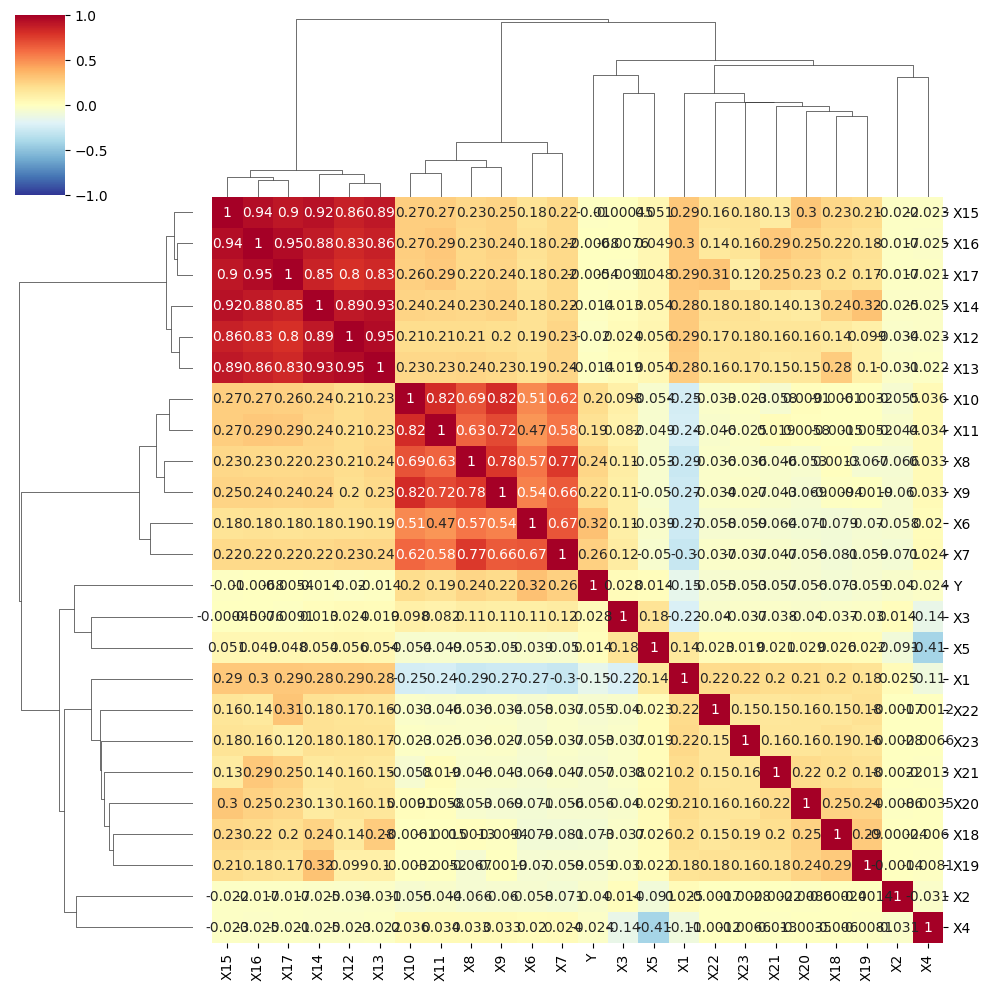

In [14]:
import seaborn as sns
sns.clustermap(cor_df, 
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              )

<Axes: >

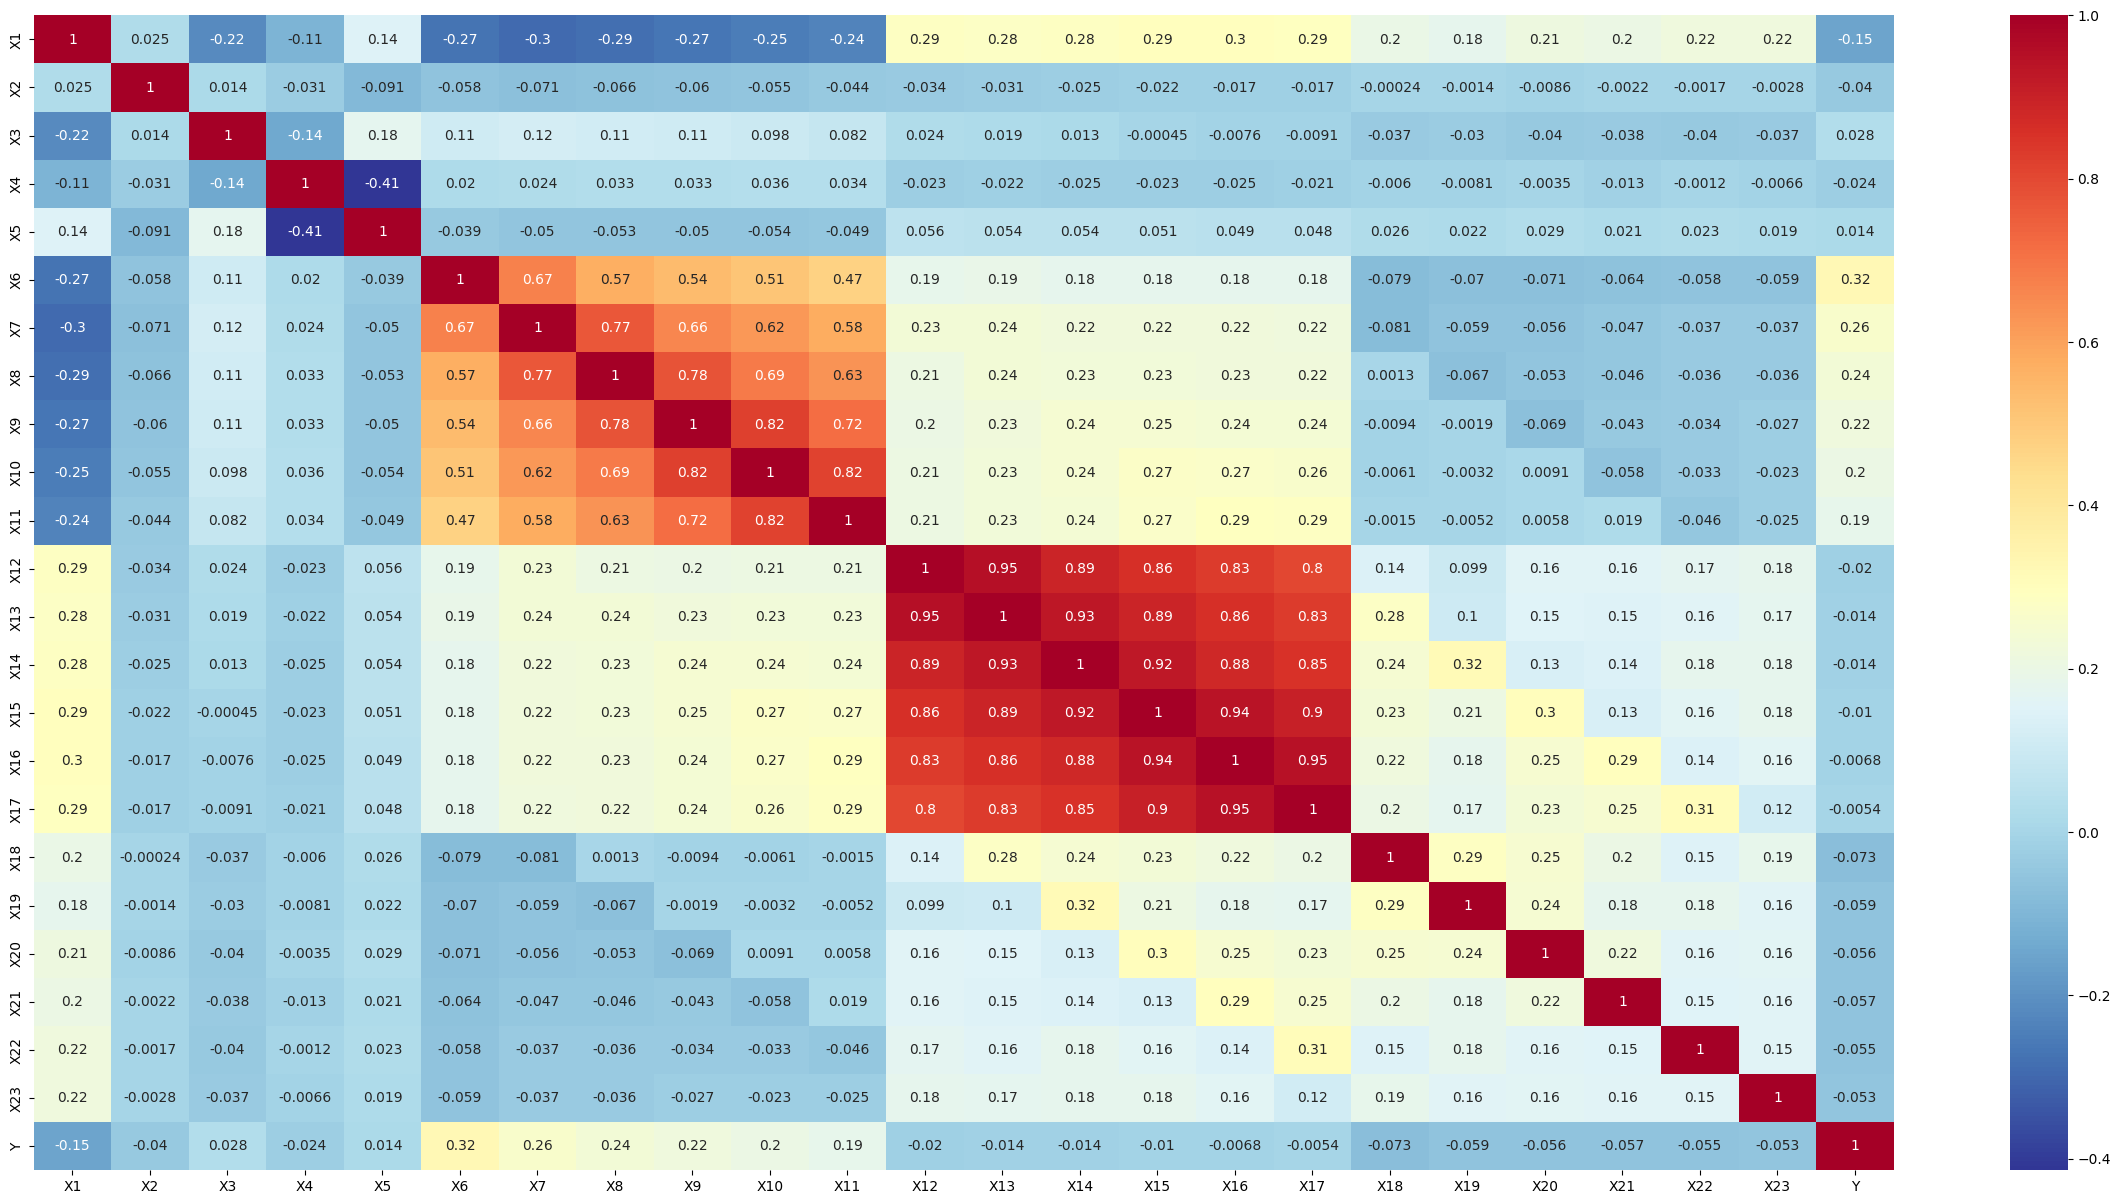

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 15)) 
sns.heatmap(cor_df, annot=True,  cmap = 'RdYlBu_r')


In [19]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      30000 non-null  float32
 1   X2      30000 non-null  float32
 2   X3      30000 non-null  float32
 3   X4      30000 non-null  float32
 4   X5      30000 non-null  float32
 5   X6      30000 non-null  float32
 6   X7      30000 non-null  float32
 7   X8      30000 non-null  float32
 8   X9      30000 non-null  float32
 9   X10     30000 non-null  float32
 10  X11     30000 non-null  float32
 11  X12     30000 non-null  float32
 12  X13     30000 non-null  float32
 13  X14     30000 non-null  float32
 14  X15     30000 non-null  float32
 15  X16     30000 non-null  float32
 16  X17     30000 non-null  float32
 17  X18     30000 non-null  float32
 18  X19     30000 non-null  float32
 19  X20     30000 non-null  float32
 20  X21     30000 non-null  float32
 21  X22     30000 non-null  float32
 22  X23

In [21]:
X = credit_df.drop('Y', axis=1)
y = credit_df['Y']

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X_scaled = StandardScaler().fit_transform(X)
X_scaled[: , 11:16]
pca = PCA(n_components=2)
pca.fit(X_scaled[: , 11:16])

bill_cols_pca = pca.transform(X_scaled[: , 11:16])

In [25]:
bill_cols_pca

array([[-1.4728636 ,  0.02477782],
       [-1.428109  , -0.04616305],
       [-0.95911515,  0.0503296 ],
       ...,
       [-1.1647491 , -0.30762637],
       [-0.08076125, -0.01796452],
       [-0.10776655,  0.09287702]], dtype=float32)

In [26]:
pca.fit(X_scaled[: , 5:11])

pay_cols_pca = pca.transform(X_scaled[: , 5:11])

In [27]:
pay_cols_pca

array([[-0.47747034, -3.224645  ],
       [ 1.4616371 ,  0.85387963],
       [ 0.39331415,  0.17555808],
       ...,
       [ 3.0030677 , -3.5371647 ],
       [ 0.01542362, -0.45708892],
       [ 0.39331415,  0.17555808]], dtype=float32)

In [29]:
X_scaled_df = pd.DataFrame(X_scaled , columns=X.columns)

In [30]:
X_scaled_df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,-1.136720,0.810161,0.185828,-1.057295,-1.246020,1.794564,1.782348,-0.696663,-0.666599,-1.530046,...,-0.667993,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382
1,-0.365981,0.810161,0.185828,0.858557,-1.029047,-0.874991,1.782348,0.138865,0.188746,0.234917,...,-0.639254,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878
2,-0.597202,0.810161,0.185828,0.858557,-0.161156,0.014861,0.111736,0.138865,0.188746,0.234917,...,-0.482408,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122
3,-0.905498,0.810161,0.185828,-1.057295,0.164303,0.014861,0.111736,0.138865,0.188746,0.234917,...,0.032846,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130
4,-0.905498,-1.234323,0.185828,-1.057295,2.334029,-0.874991,0.111736,-0.696663,0.188746,0.234917,...,-0.161189,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187


In [33]:
X_scaled_df.iloc[:, :5] 

,X1,X2,X3,X4,X5
0,-1.136720,0.810161,0.185828,-1.057295,-1.246020
1,-0.365981,0.810161,0.185828,0.858557,-1.029047
2,-0.597202,0.810161,0.185828,0.858557,-0.161156
3,-0.905498,0.810161,0.185828,-1.057295,0.164303
4,-0.905498,-1.234323,0.185828,-1.057295,2.334029
...,...,...,...,...,...
29995,0.404759,-1.234323,1.451114,-1.057295,0.381275
29996,-0.134759,-1.234323,1.451114,0.858557,0.815221
29997,-1.059646,-1.234323,0.185828,0.858557,0.164303
29998,-0.674276,-1.234323,1.451114,-1.057295,0.598248


In [36]:
X_scaled_df_drop  = pd.concat ([X_scaled_df.iloc[:, :5] , X_scaled_df.iloc[:, 16:]] ,axis=1)

In [37]:
X_scaled_df_drop  

,X1,X2,X3,X4,X5,X17,X18,X19,X20,X21,X22,X23
0,-1.136720,0.810161,0.185828,-1.057295,-1.246020,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382
1,-0.365981,0.810161,0.185828,0.858557,-1.029047,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878
2,-0.597202,0.810161,0.185828,0.858557,-0.161156,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122
3,-0.905498,0.810161,0.185828,-1.057295,0.164303,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130
4,-0.905498,-1.234323,0.185828,-1.057295,2.334029,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187
...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.404759,-1.234323,1.451114,-1.057295,0.381275,-0.384392,0.171250,0.611048,-0.012648,-0.113564,0.013131,-0.237130
29996,-0.134759,-1.234323,1.451114,0.858557,0.815221,-0.652724,-0.231032,-0.103955,0.214255,-0.299828,-0.314136,-0.293382
29997,-1.059646,-1.234323,0.185828,0.858557,0.164303,-0.327687,-0.341942,-0.256990,0.952725,-0.039964,-0.183229,-0.119001
29998,-0.674276,-1.234323,1.451114,-1.057295,0.598248,0.169130,4.844316,-0.109033,-0.229895,-0.185120,3.152536,-0.191904


In [38]:
X_scaled_df_drop[['bill_1', 'bill_2']] = bill_cols_pca

In [39]:
X_scaled_df_drop[['pay_1', 'pay_2']] = pay_cols_pca

In [40]:
X_scaled_df_drop.head()

,X1,X2,X3,X4,X5,X17,X18,X19,X20,X21,X22,X23,bill_1,bill_2,pay_1,pay_2
0,-1.136720,0.810161,0.185828,-1.057295,-1.246020,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382,-1.472864,0.024778,-0.477470,-3.224645
1,-0.365981,0.810161,0.185828,0.858557,-1.029047,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878,-1.428109,-0.046163,1.461637,0.853880
2,-0.597202,0.810161,0.185828,0.858557,-0.161156,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122,-0.959115,0.050330,0.393314,0.175558
3,-0.905498,0.810161,0.185828,-1.057295,0.164303,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130,-0.203406,0.167305,0.393314,0.175558
4,-0.905498,-1.234323,0.185828,-1.057295,2.334029,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187,-0.914308,-0.232211,-0.273291,0.847431


In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import numpy as np
lr_clf = LogisticRegression()

result = cross_val_score(lr_clf , X_scaled_df_drop , y , scoring='accuracy')
np.mean(result)

0.8046